In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/',
source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/',
one_hot=True)

print("Training set (images): {}".format(mnist.train.images.shape))
print("Training set (labels): {}".format(mnist.train.labels.shape))
print("Test set (images): {}".format(mnist.test.images.shape))
print("Test set (labels): {}".format(mnist.test.labels.shape))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Training set (images): (55000, 784)
Training set (labels): (55000, 10)
Test set (images): (10000, 784)
Test set (labels): (10000, 10)


y = 3 (Dress)


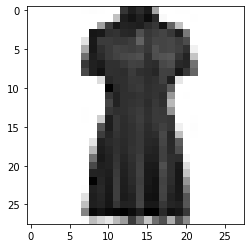

In [5]:
label_names = [
'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
# get 28 by 28 image
sample_1 = mnist.train.images[47].reshape(28, 28)
# get corresponding integer label from one-hot encoded data
sample_label_1 = np.where(mnist.train.labels[47] == 1)[0][0]
# plot sample
print("y = {label_index} ({label})".format(
label_index=sample_label_1, label=label_names[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')

In [7]:
X=tf.placeholder(dtype=tf.float32,shape=[None,784])
Y=tf.placeholder(dtype=tf.float32,shape=[None,10])

W1=tf.Variable(tf.random_normal([784,256]))
b1=tf.Variable(tf.random_normal([256]))
Z1=tf.nn.sigmoid(tf.matmul(X,W1)+b1)

W2=tf.Variable(tf.random_normal([256,10]))
b2=tf.Variable(tf.random_normal([10]))
S2=tf.matmul(Z1,W2)+b2

hypothesis=S2

loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))

corrects=tf.equal(tf.argmax(hypothesis,axis=1),tf.argmax(Y,axis=1))
accuracy=tf.reduce_mean(tf.cast(corrects,tf.float32))

In [13]:
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 100

optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(EPOCHS):
        for _ in range(int(mnist.train.num_examples / BATCH_SIZE)):
            X_batch, Y_batch = mnist.train.next_batch(BATCH_SIZE)
            sess.run(optimizer,feed_dict={X:X_batch,Y:Y_batch})
            
        if (epoch+1) % 1 == 0:
            acc_val = sess.run( accuracy , feed_dict={X:mnist.test.images,Y:mnist.test.labels})
            print("epoch: {:04d}, accuracy: {:.2f}".format(epoch+1, acc_val))
        
    print("Learning finished.")
        
    pred_val = sess.run( hypothesis , feed_dict={X:mnist.test.images,Y:mnist.test.labels})
    print(classification_report(mnist.test.labels.argmax(axis=1),
        pred_val.argmax(axis=1), target_names=label_names))

epoch: 0001, accuracy: 0.76
epoch: 0002, accuracy: 0.79
epoch: 0003, accuracy: 0.81
epoch: 0004, accuracy: 0.82
epoch: 0005, accuracy: 0.83
epoch: 0006, accuracy: 0.83
epoch: 0007, accuracy: 0.84
epoch: 0008, accuracy: 0.84
epoch: 0009, accuracy: 0.85
epoch: 0010, accuracy: 0.85
epoch: 0011, accuracy: 0.85
epoch: 0012, accuracy: 0.85
epoch: 0013, accuracy: 0.85
epoch: 0014, accuracy: 0.85
epoch: 0015, accuracy: 0.86
epoch: 0016, accuracy: 0.86
epoch: 0017, accuracy: 0.86
epoch: 0018, accuracy: 0.86
epoch: 0019, accuracy: 0.86
epoch: 0020, accuracy: 0.86
epoch: 0021, accuracy: 0.86
epoch: 0022, accuracy: 0.86
epoch: 0023, accuracy: 0.86
epoch: 0024, accuracy: 0.86
epoch: 0025, accuracy: 0.86
epoch: 0026, accuracy: 0.87
epoch: 0027, accuracy: 0.87
epoch: 0028, accuracy: 0.87
epoch: 0029, accuracy: 0.87
epoch: 0030, accuracy: 0.86
epoch: 0031, accuracy: 0.87
epoch: 0032, accuracy: 0.87
epoch: 0033, accuracy: 0.87
epoch: 0034, accuracy: 0.87
epoch: 0035, accuracy: 0.87
epoch: 0036, accurac